# ** PROJET 2 - Analyse des données de systèmes éducatifs **

Logo

> **Academy**, startup proposant des cours en ligne, a le projet de se développer à l'international.
Il nous confie la mission d'analyse exploratoire pour savoir si les données de la Banque Mondiale permettent de valider le projet d'expansion.  
Source: [Banque Mondiale de données](https://datacatalog.worldbank.org/search/dataset/0038480)

In [1]:
# Installation du packahe Missingno pour le graphique de complétude des données

! pip install missingno

In [2]:
# Importation des diverses librairies qui pourraient nous être utiles

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas as gpd
import missingno as msno

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [103]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 100)

# Analyse de la forme des données

>**EdStatsCountry.csv**
>Contient tous les données sur les pays, d'un point de vue géographique et économique

In [4]:
# Importation du fichier qui nous permet de récupérer les groupes de pays par revenus et par régions

stats_country = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsCountry.csv")
stats_country.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,2007,NaN,Value added at producer prices (VAP),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,2004,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1971–84,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS

In [5]:
stats_country.shape

(241, 32)

In [6]:
print(f"EdStatsCountry contient {stats_country.shape[0]} lignes et {stats_country.shape[1]} colonnes")

EdStatsCountry contient 241 lignes et 32 colonnes


In [7]:
stats_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [108]:
def missing_values(X, thrs=80):
    total = X.isnull().sum().sort_values(ascending=False)
    percent = X.isnull().sum()/X.isnull().count().sort_values(ascending=False)*100
    missing_data = pd.concat([total,percent], axis=1, keys=['total', 'percentage'])
    features_of_interest = list(missing_data[(percent<=thrs)].index)
    return features_of_interest, missing_data


missing_values(stats_country)

C:\Users\choup\AppData\Local\Temp/ipykernel_8300/3268794936.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_of_interest = list(missing_data[(percent<=thrs)].index)


(['Other groups',
  'Latest industrial data',
  'Vital registration complete',
  'External debt Reporting status',
  'Latest household survey',
  'Latest agricultural census',
  'Lending category',
  'PPP survey year',
  'Special Notes',
  'Source of most recent Income and expenditure data',
  'Government Accounting concept',
  'Latest water withdrawal data',
  'IMF data dissemination standard',
  'Balance of Payments Manual in use',
  'Latest trade data',
  'SNA price valuation',
  'System of trade',
  'National accounts base year',
  'Latest population census',
  'Region',
  'Income Group',
  'Currency Unit',
  'System of National Accounts',
  '2-alpha code',
  'WB-2 code',
  'Long Name',
  'Short Name',
  'Table Name',
  'Country Code'],
                                                    total  percentage
 Unnamed: 31                                          241  100.000000
 National accounts reference year                     209   86.721992
 Alternative conversion factor         

<AxesSubplot:>

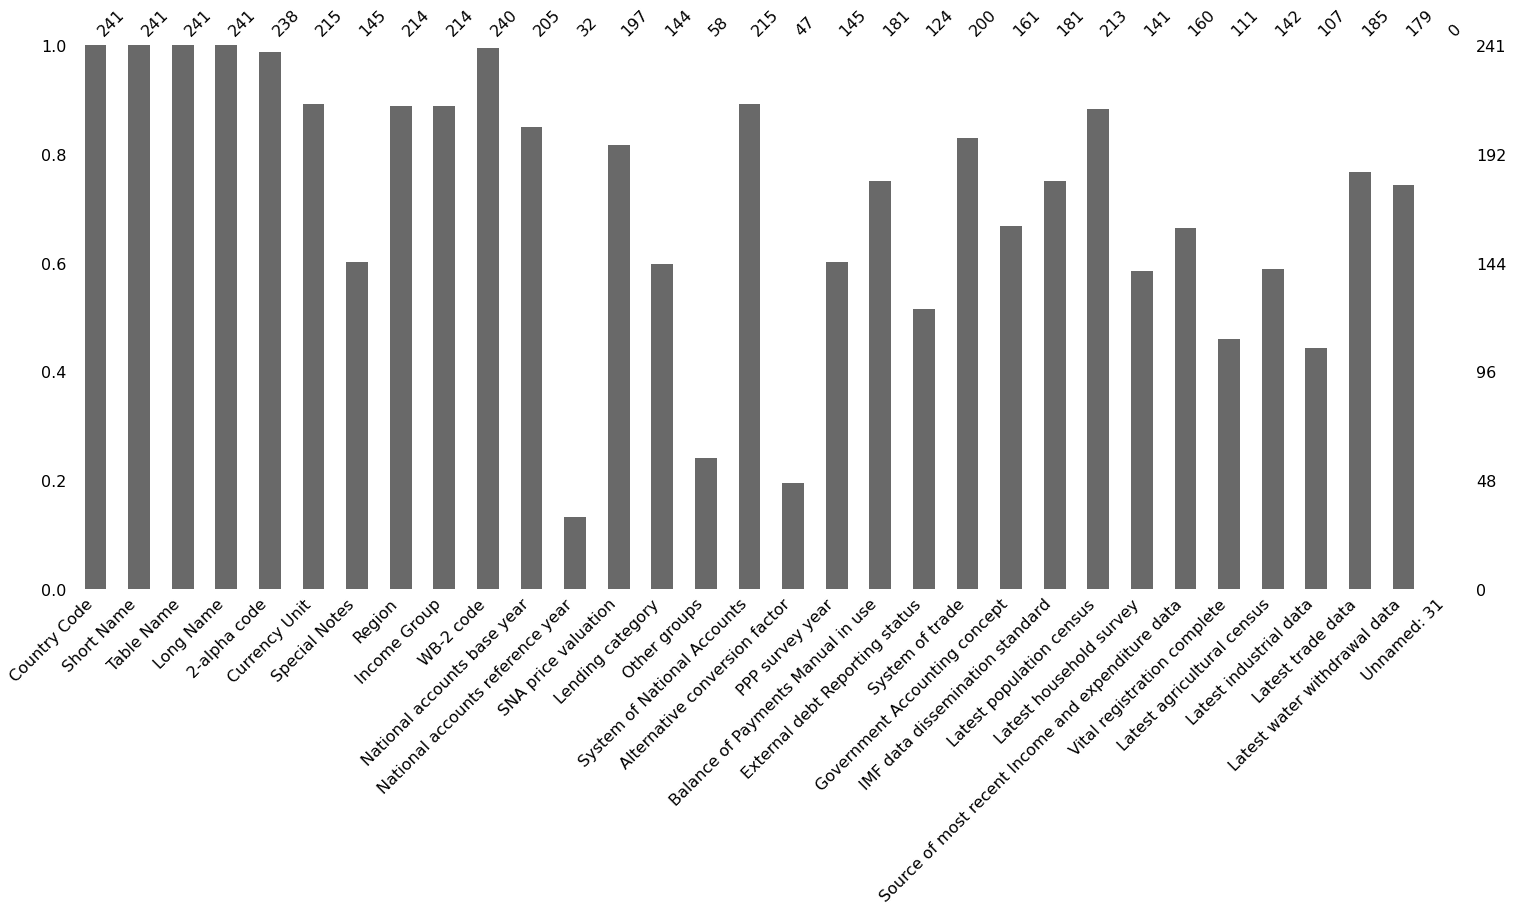

In [8]:
msno.bar(stats_country.sample(241))

In [9]:
# Vérifier qu'il n'y a pas de doublon dans la colonne "Country Code" qui représente l'ensemble des pays

stats_country.duplicated('Country Code', keep='first').sum()

0

In [10]:
stats_country.groupby('Region')['Country Code'].count().sort_values(ascending=False)

Region
Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Country Code, dtype: int64

---

>**EdStatsCountry-Series.csv**
> Il contient les sources des études

In [11]:
# Importation du fichier EdStatsCountry-Series

stats_country_series = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsCountry-Series.csv")
stats_country_series.head(10)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
5,AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.,NaN
7,AFG,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
8,AFG,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
9,AFG,NY.GNP.PCAP.PP.CD,Estimates are based on regression.,NaN


In [12]:
stats_country_series.shape

(613, 4)

In [13]:
print(f"EdStatsCountry-Series contient {stats_country_series.shape[0]} lignes et {stats_country_series.shape[1]} colonnes")

EdStatsCountry-Series contient 613 lignes et 4 colonnes


In [14]:
stats_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [109]:
# % de données absentes

missing_values(stats_country_series)

C:\Users\choup\AppData\Local\Temp/ipykernel_8300/3268794936.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_of_interest = list(missing_data[(percent<=thrs)].index)


(['CountryCode', 'SeriesCode', 'DESCRIPTION'],
              total  percentage
 Unnamed: 3     613       100.0
 CountryCode      0         0.0
 SeriesCode       0         0.0
 DESCRIPTION      0         0.0)

<AxesSubplot:>

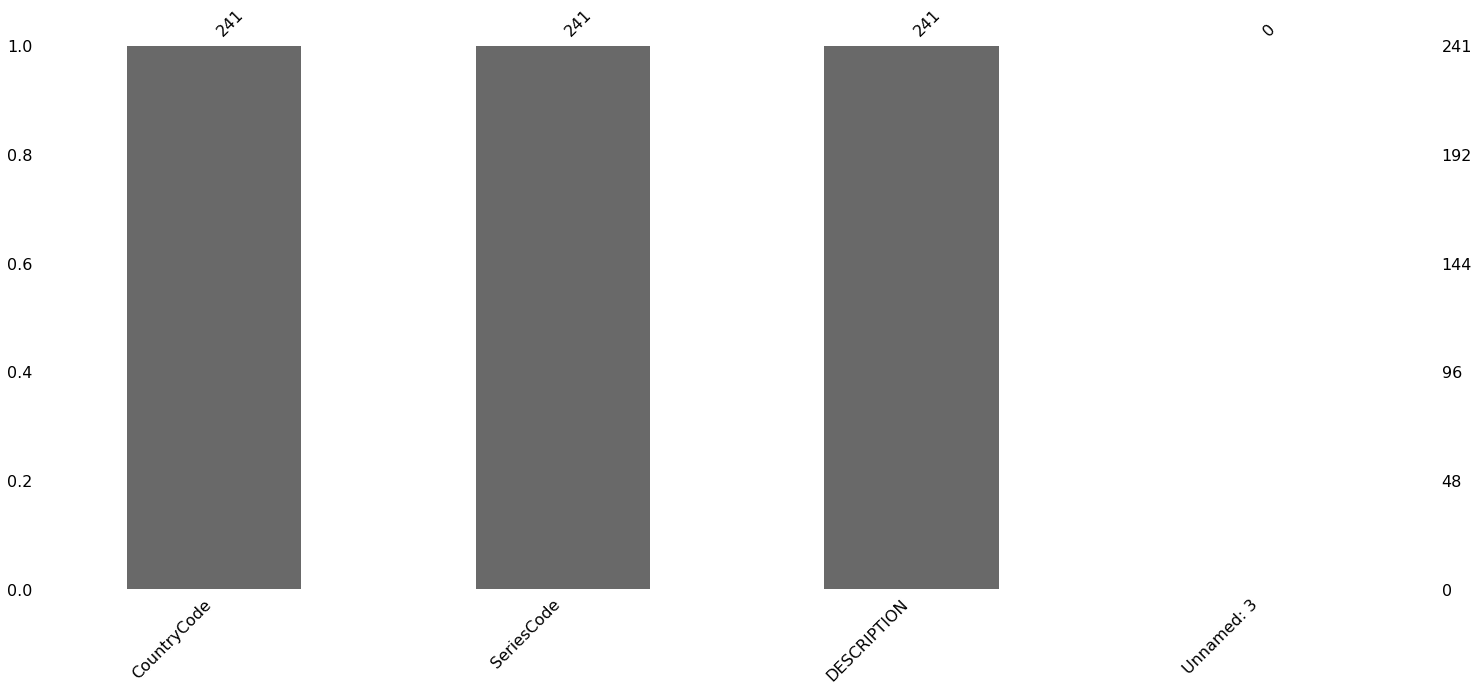

In [16]:
msno.bar(stats_country_series.sample(241))

---

>**EdStatsData.csv**
>Contient les indicateurs des études des systèmes éducatifs, par pays et par année, de 1970 à 2100.

In [17]:
# Importation du fichier "EdStatsData.csv" qui contient les indicateurs

stats_data = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsData.csv")
stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
stats_data.shape

(886930, 70)

In [19]:
print(f"EdStatsData contient {stats_data.shape[0]} lignes et {stats_data.shape[1]} colonnes")

EdStatsData contient 886930 lignes et 70 colonnes


In [20]:
stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [110]:
# % de données absentes

missing_values(stats_data)

C:\Users\choup\AppData\Local\Temp/ipykernel_8300/3268794936.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_of_interest = list(missing_data[(percent<=thrs)].index)


(['2005',
  '2010',
  'Country Code',
  'Indicator Code',
  'Indicator Name',
  'Country Name'],
                  total  percentage
 Unnamed: 69     886930  100.000000
 2017            886787   99.983877
 2016            870470   98.144160
 1971            851393   95.993258
 1973            851385   95.992356
 1972            851311   95.984012
 1974            851200   95.971497
 1979            850121   95.849842
 1976            849447   95.773849
 1982            849419   95.770692
 1989            849390   95.767422
 1977            849356   95.763589
 1978            849354   95.763364
 1983            848470   95.663694
 1988            848378   95.653321
 1984            848324   95.647233
 1987            848289   95.643286
 1981            848153   95.627953
 1986            847558   95.560867
 2045            835494   94.200670
 2070            835494   94.200670
 2065            835494   94.200670
 2060            835494   94.200670
 2055            835494   94.200670
 20

<AxesSubplot:>

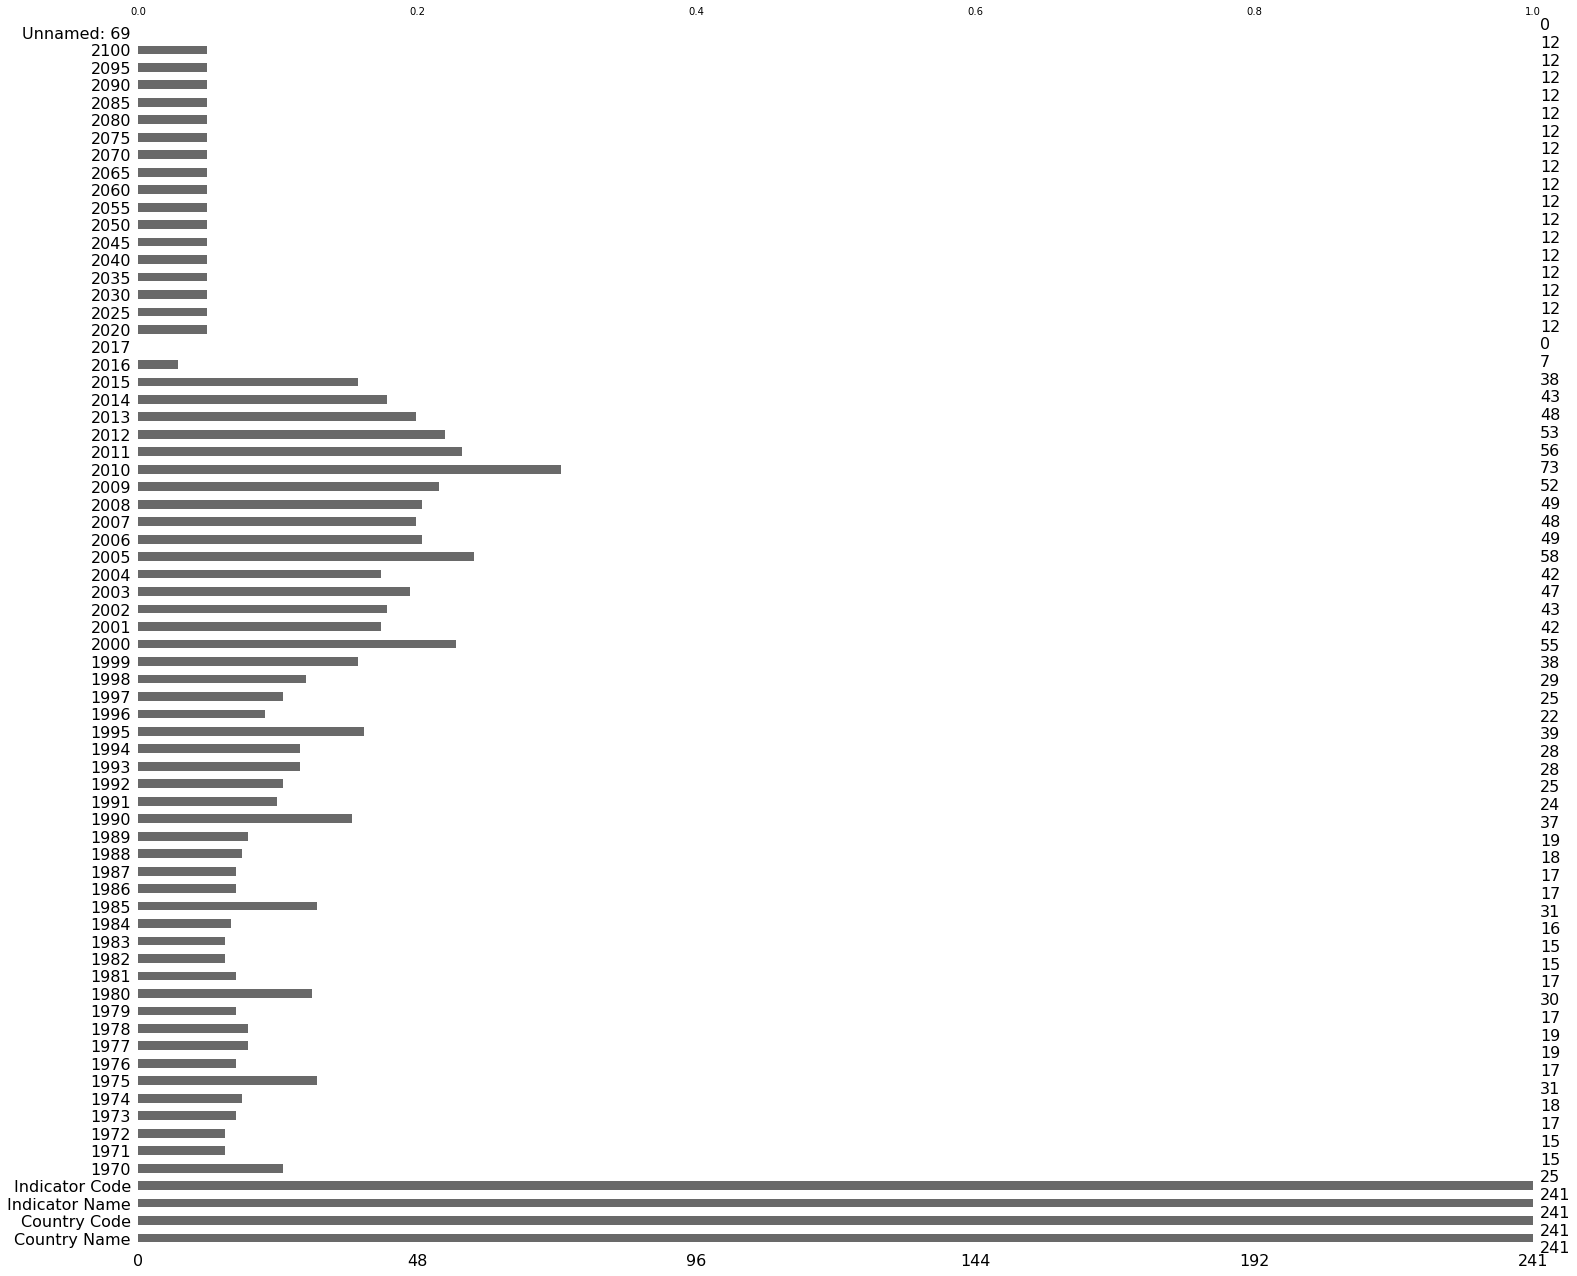

In [22]:
msno.bar(stats_data.sample(241))

In [23]:
stats_data['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


Ce jeu de donnée représentera la base de notre analyse

---

>**EdStatsFootNote.csv**
> Il contient des informations sur les codes et les dates des indicateurs 

In [24]:
# Importation du fichier EdStatsFootNote

stats_foot_note = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsFootNote.csv")
stats_foot_note.head(20)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [25]:
stats_foot_note.shape

(643638, 5)

In [26]:
print(f"EdStatsFootNote contient {stats_foot_note.shape[0]} lignes et {stats_foot_note.shape[1]} colonnes")

EdStatsFootNote contient 643638 lignes et 5 colonnes


In [27]:
stats_foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [111]:
# % de données absentes

missing_values(stats_foot_note)

C:\Users\choup\AppData\Local\Temp/ipykernel_8300/3268794936.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_of_interest = list(missing_data[(percent<=thrs)].index)


(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION'],
               total  percentage
 Unnamed: 4   643638       100.0
 CountryCode       0         0.0
 SeriesCode        0         0.0
 Year              0         0.0
 DESCRIPTION       0         0.0)

<AxesSubplot:>

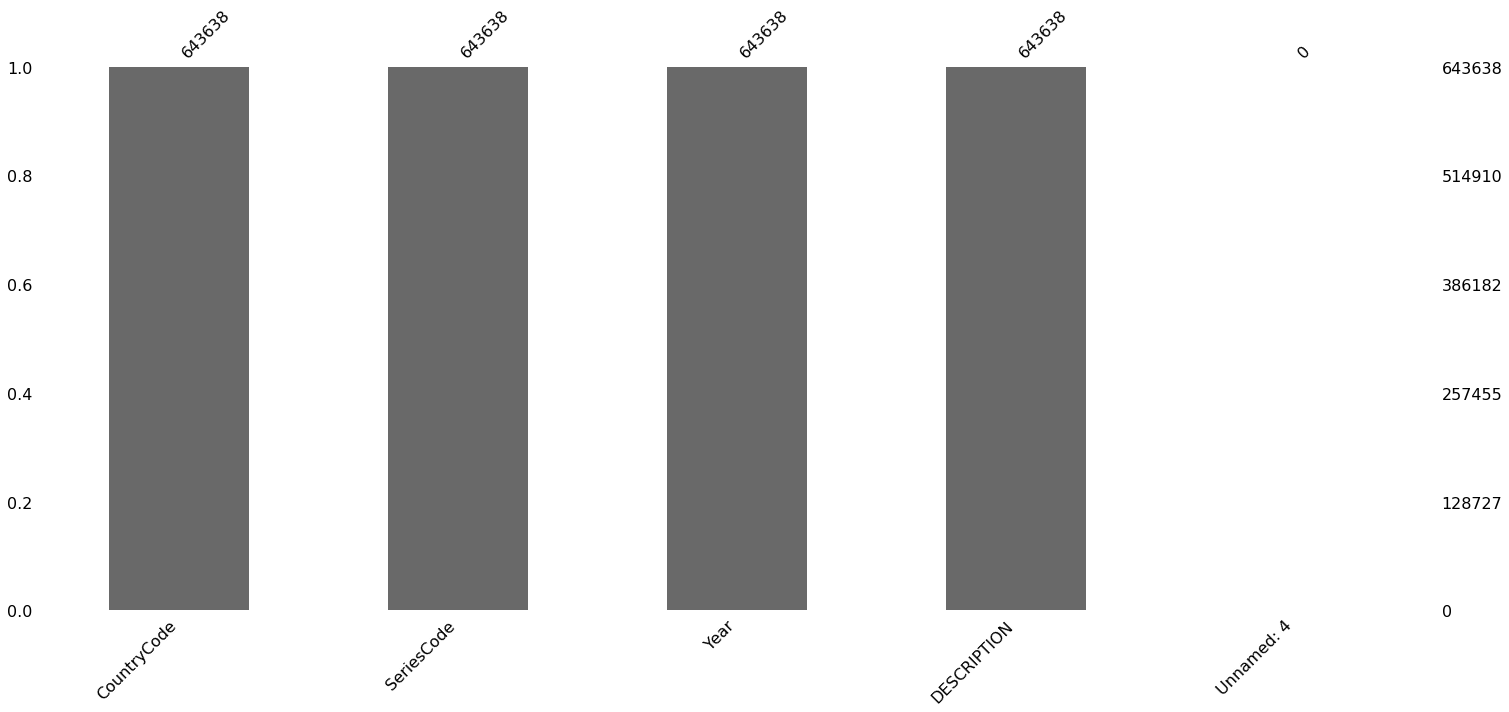

In [29]:
msno.bar(stats_foot_note.sample(643638))

---

>**EdSstatsSeries.csv**
> Il contient des informations sur la définition des indicateurs.

In [30]:
# Importation du fichier EdSstatsSeries

stats_series = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsSeries.csv")
stats_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
stats_series.shape

(3665, 21)

In [32]:
print(f"EdSstatsSeries contient {stats_series.shape[0]} lignes et {stats_series.shape[1]} colonnes")

EdSstatsSeries contient 3665 lignes et 21 colonnes


In [33]:
stats_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [112]:
# % de données absentes

missing_values(stats_series)

C:\Users\choup\AppData\Local\Temp/ipykernel_8300/3268794936.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_of_interest = list(missing_data[(percent<=thrs)].index)


(['Short definition',
  'Topic',
  'Source',
  'Long definition',
  'Indicator Name',
  'Series Code'],
                                      total  percentage
 Unnamed: 20                           3665  100.000000
 Notes from original source            3665  100.000000
 License Type                          3665  100.000000
 Related indicators                    3665  100.000000
 Other web links                       3665  100.000000
 Unit of measure                       3665  100.000000
 Development relevance                 3662   99.918145
 General comments                      3651   99.618008
 Limitations and exceptions            3651   99.618008
 Statistical concept and methodology   3642   99.372442
 Aggregation method                    3618   98.717599
 Periodicity                           3566   97.298772
 Related source links                  3450   94.133697
 Base Period                           3351   91.432469
 Other notes                           3113   84.938608


<AxesSubplot:>

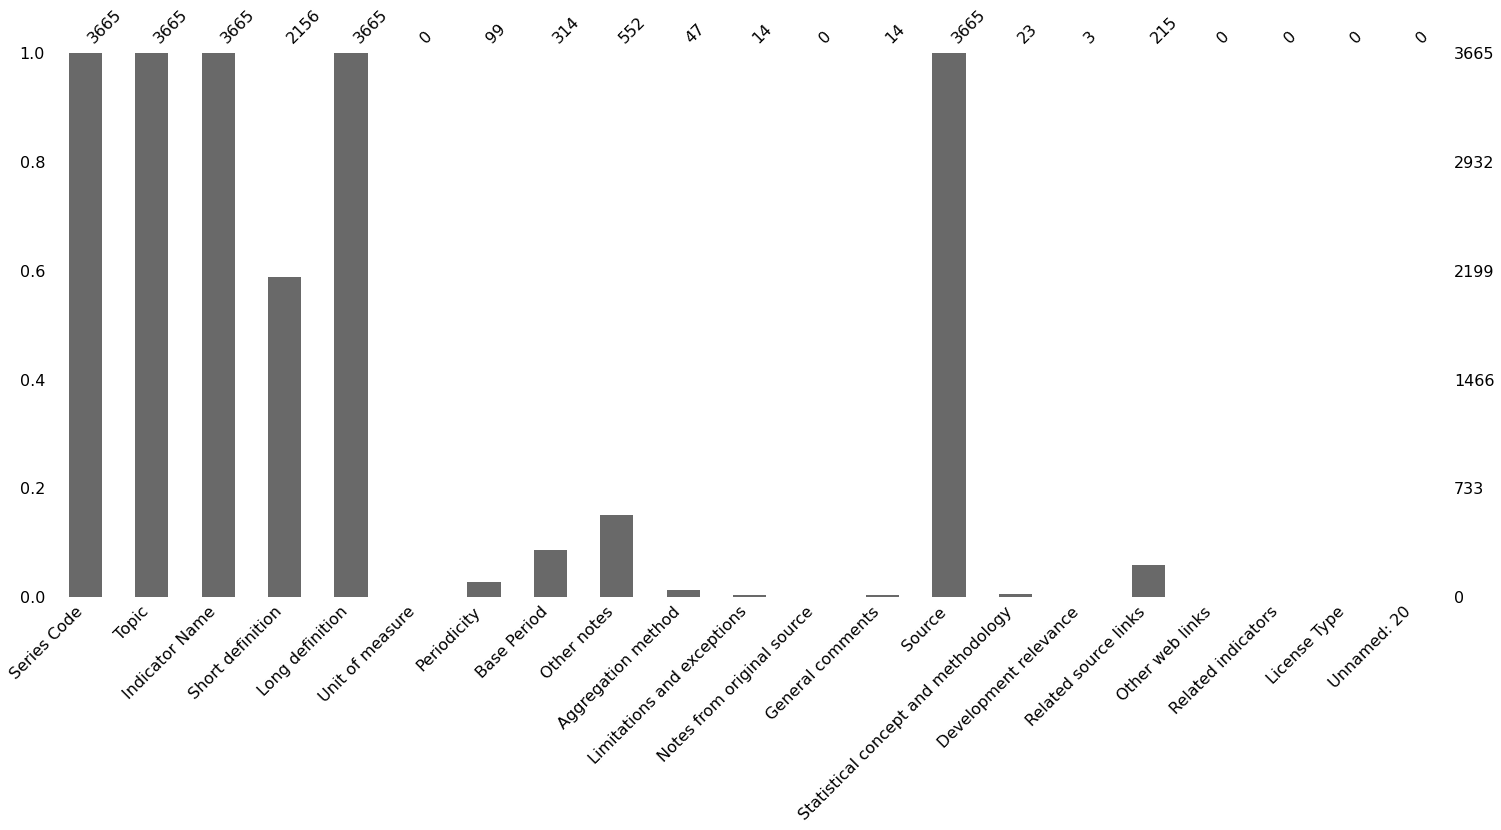

In [34]:
msno.bar(stats_series.sample(3665))

---

# Analyse de fond: choix des indictateurs

Il me parait judicieux de pouvoir se rendre compte du nombre de la population des pays étudiés. En effet, préconiser un développement sur un pays avec peu d'habitants ne serait pas judicieux.  

**Méthode appliquée:**  
- L'indicateur *'population totale'* se trouve dans le dataframe EdStatsData.csv
- Vérification que les pays sont uniques, qu'il n'y a pas de doublon
- Vérification de la complétude des données par années
- Complétude des données manquantes par les dernières données les plus récentes
- Seuils minimal et maximal de population que nous souhaitons prende en compte
- Visualisation des pays ayant le plus de population

In [70]:
indicateurs = (
    'Population, total', 
    'Enrolment in secondary education, both sexes (number)',
    'Expenditure on secondary as % of government expenditure on education (%)', 
    'Internet users (per 100 people)'
)

In [74]:
df_base = pd.merge(stats_data, stats_country[['Country Code', 'Region', 'Income Group']],how= 'left', on='Country Code')
df_base = df_base[df_base['Indicator Name'].isin(indicateurs)]
df_base = df_base.rename(columns = {'Unnamed: 69':'Dernieres_Donnees_Dispo'})
df_base.dropna(subset=['Region'], axis=0, inplace=True)
df_base.head(70)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Dernieres_Donnees_Dispo,Region,Income Group
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1.161740e+05,1.340690e+05,1.530600e+05,1.653460e+05,1.727970e+05,1.857230e+05,2.048890e+05,2.233790e+05,2.386740e+05,NaN,2.933080e+05,3.329350e+05,1.784230e+05,NaN,1.983370e+05,2.063810e+05,1.877450e+05,NaN,2.053920e+05,2.025720e+05,1.823400e+05,2.819280e+05,NaN,3.321700e+05,4.977620e+05,5.128510e+05,NaN,NaN,NaN,NaN,NaN,...,4.068950e+05,5.943060e+05,6.514530e+05,1.006841e+06,1.035782e+06,1.425009e+06,1.716190e+06,2.044157e+06,2.208963e+06,2.415884e+06,2.538420e+06,2.602734e+06,2.698816e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
92861,Afghanistan,AFG,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,NaN,4.082087e+01,NaN,NaN,NaN,3.684718e+01,NaN,NaN,NaN,2.131231e+01,2.150639e+01,2.453649e+01,2.249563e+01,2.306347e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.669373e+01,2.662432e+01,2.539486e+01,2.577935e+01,2.539206e+01,2.435630e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,1.059573e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1.112612e+07,1.141782e+07,1.172194e+07,1.202782e+07,1.232154e+07,1.259029e+07,1.284030e+07,1.306754e+07,1.323773e+07,1.330670e+07,1.324837e+07,1.305395e+07,1.274964e+07,1.238927e+07,1.204712e+07,1.178305e+07,1.160104e+07,1.150276e+07,1.154089e+07,1.177761e+07,1.224911e+07,1.299366e+07,1.398123e+07,1.509510e+07,1.617272e+07,1.709954e+07,1.782288e+07,1.838160e+07,1.886400e+07,1.940368e+07,2.009376e+07,...,2.306485e+07,2.411898e+07,2.507080e+07,2.589345e+07,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
96481,Albania,ALB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,3.960990e+05,NaN,4.156010e+05,4.282180e+05,4.406170e+05,4.475010e+05,4.287500e+05,4.052930e+05,4.085910e+05,4.268370e+05,4.467940e+05,4.496990e+05,4.598800e+05,4.659580e+05,4.750740e+05,4.782850e+05,4.049040e+05,3.624390e+05,3.509120e+05,3.494300e+05,3.469450e+05,3.501570e+05,3.595090e+05,3.635020e+05,3.656640e+05,...,3.960950e+05,3.935030e+05,4.074030e+05,4.089800e+05,4.104440e+05,4.065530e+05,3.545870e+05,3.558710e+05,3.551580e+05,3.492690e+05,3.463650e+05,3.332910e+05,3.150790e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,Upper middle income
96526,Albania,ALB,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.967400e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.983156e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,Upper middle income
96665,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2

In [75]:
df_completude = df_base.fillna(method ='ffill', axis = 1)
df_completude.head(50)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Dernieres_Donnees_Dispo,Region,Income Group
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,116174.0,134069.0,153060.0,165346.0,172797.0,185723.0,204889.0,223379.0,238674.0,238674.0,293308.0,332935.0,178423.0,178423.0,198337.0,206381.0,187745.0,187745.0,205392.0,202572.0,182340.0,281928.0,281928.0,332170.0,497762.0,512851.0,512851.0,512851.0,512851.0,512851.0,512851.0,...,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,2698816.0,South Asia,Low income
92861,Afghanistan,AFG,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,SE.XPD.SECO.ZS,40.820869,40.820869,40.820869,40.820869,36.847179,36.847179,36.847179,36.847179,21.312309,21.50639,24.536489,22.49563,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,...,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,23.063471,26.693729,26.624319,25.394859,25.77935,25.392059,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,24.3563,South Asia,Low income
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,IT.NET.USER.P2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087891,0.105809,1.224148,2.107124,1.9,1.84,3.55,4.0,5.0,5.454545,5.9,7.0,8.26,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,10.595726,South Asia,Low income
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999.0,19403676.0,20093756.0,...,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,34656032.0,South Asia,Low income
96481,Albania,ALB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,SE.SEC.ENRL,SE.SEC.ENRL,SE.SEC.ENRL,SE.SEC.ENRL,SE.SEC.ENRL,SE.SEC.ENRL,396099.0,396099.0,415601.0,428218.0,440617.0,447501.0,428750.0,405293.0,408591.0,426837.0,446794.0,449699.0,459880.0,465958.0,475074.0,478285.0,404904.0,362439.0,350912.0,349430.0,346945.0,350157.0,359509.0,363502.0,365664.0,...,396095.0,393503.0,407403.0,408980.0,410444.0,406553.0,354587.0,355871.0,355158.0,349269.0,346365.0,333291.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,315079.0,31

In [82]:
df = df_completude.drop(list(df_completude.filter(regex="^[-+]?[0-9]+$").columns), axis=1)
df = df[['Region', 'Income Group', 'Country Name', 'Indicator Name', 'Dernieres_Donnees_Dispo']]
df['Dernieres_Donnees_Dispo'] = pd.to_numeric(df['Dernieres_Donnees_Dispo'],errors='coerce', downcast="float")

df.head(50)

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
92816,South Asia,Low income,Afghanistan,"Enrolment in secondary education, both sexes (...",2.698816e+06
92861,South Asia,Low income,Afghanistan,Expenditure on secondary as % of government ex...,2.435630e+01
93000,South Asia,Low income,Afghanistan,Internet users (per 100 people),1.059573e+01
94158,South Asia,Low income,Afghanistan,"Population, total",3.465603e+07
96481,Europe & Central Asia,Upper middle income,Albania,"Enrolment in secondary education, both sexes (...",3.150790e+05
96526,Europe & Central Asia,Upper middle income,Albania,Expenditure on secondary as % of government ex...,1.983156e+01
96665,Europe & Central Asia,Upper middle income,Albania,Internet users (per 100 people),6.636344e+01
97823,Europe & Central Asia,Upper middle income,Albania,"Population, total",2.876101e+06
100146,Middle East & North Africa,Upper middle income,Algeria,"Enrolment in secondary education, both sexes (...",4.572513e+06
100191,Middle East & North Africa,Upper middle income,Algeria,Expenditure on secondary as % of government ex...,2.384710e+01


In [83]:
df.dtypes

Region                      object
Income Group                object
Country Name                object
Indicator Name              object
Dernieres_Donnees_Dispo    float32
dtype: object

In [85]:
df.shape

(856, 5)

<AxesSubplot:>

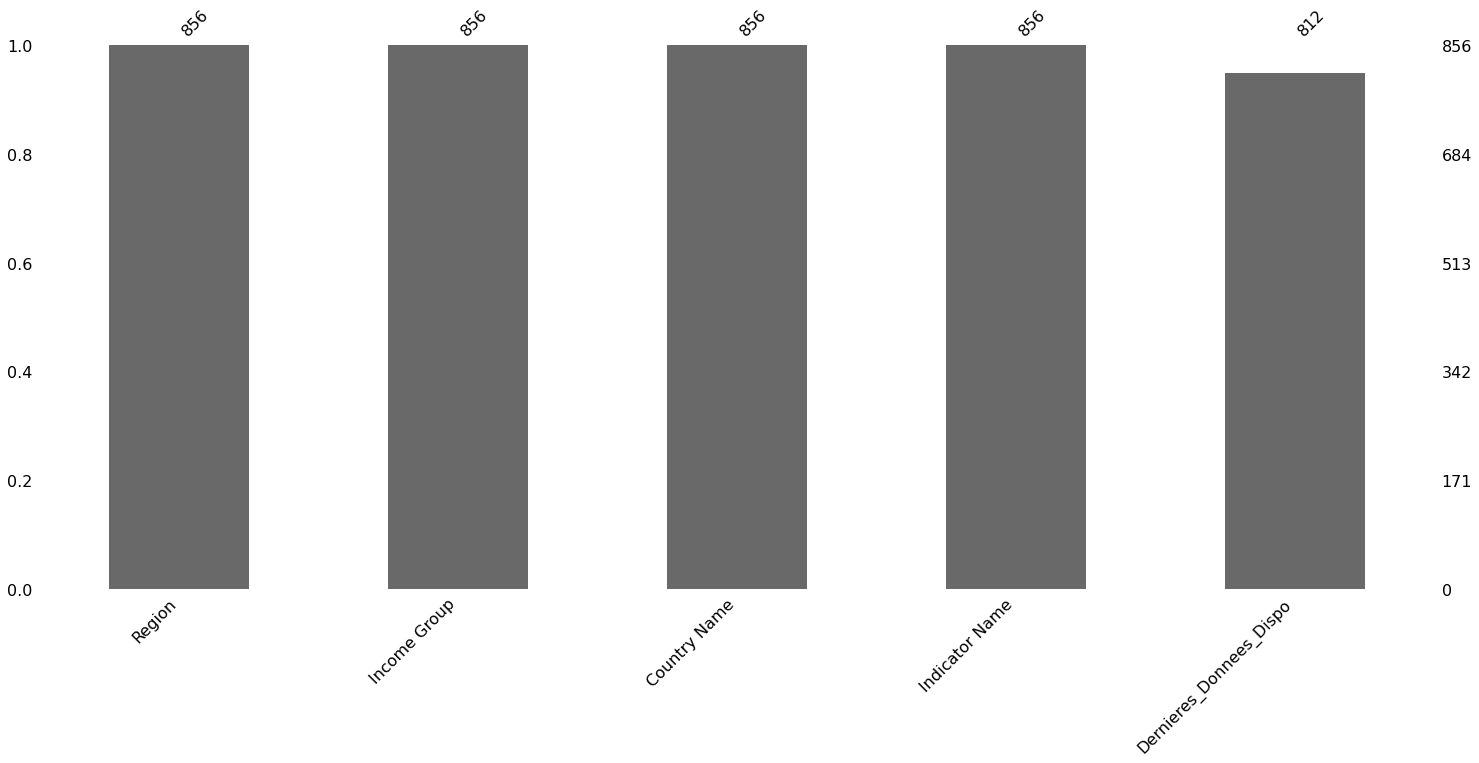

In [87]:
msno.bar(df.sample(856))

In [88]:
df[df['Dernieres_Donnees_Dispo'].isna()]

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
103856,East Asia & Pacific,Upper middle income,American Samoa,Expenditure on secondary as % of government ex...,NaN
136841,Europe & Central Asia,Upper middle income,Azerbaijan,Expenditure on secondary as % of government ex...,NaN
140506,Latin America & Caribbean,High income: nonOECD,"Bahamas, The",Expenditure on secondary as % of government ex...,NaN
155166,Europe & Central Asia,Upper middle income,Belarus,Expenditure on secondary as % of government ex...,NaN
180821,Europe & Central Asia,Upper middle income,Bosnia and Herzegovina,Expenditure on secondary as % of government ex...,NaN
235751,Europe & Central Asia,High income: nonOECD,Channel Islands,"Enrolment in secondary education, both sexes (...",NaN
235796,Europe & Central Asia,High income: nonOECD,Channel Islands,Expenditure on secondary as % of government ex...,NaN
235935,Europe & Central Asia,High income: nonOECD,Channel Islands,Internet users (per 100 people),NaN
268781,Europe & Central Asia,High income: nonOECD,Croatia,Expenditure on secondary as % of government ex...,NaN
276250,Latin America & Caribbean,High income: nonOECD,Curacao,Internet users (per 100 people),NaN


In [104]:
df[df['Indicator Name'].isin(['Population, total'])].sort_values('Dernieres_Donnees_Dispo', ascending=False).head(100)

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
244423,East Asia & Pacific,Upper middle income,China,"Population, total",1.378665e+09
416678,South Asia,Lower middle income,India,"Population, total",1.324171e+09
849148,North America,High income: OECD,United States,"Population, total",3.231275e+08
420343,East Asia & Pacific,Lower middle income,Indonesia,"Population, total",2.611155e+08
189448,Latin America & Caribbean,Upper middle income,Brazil,"Population, total",2.076529e+08
636578,South Asia,Lower middle income,Pakistan,"Population, total",1.932035e+08
621918,Sub-Saharan Africa,Lower middle income,Nigeria,"Population, total",1.859896e+08
149133,South Asia,Low income,Bangladesh,"Population, total",1.629516e+08
680558,Europe & Central Asia,High income: nonOECD,Russian Federation,"Population, total",1.443424e+08
559613,Latin America & Caribbean,Upper middle income,Mexico,"Population, total",1.275404e+08


In [105]:
df[df['Indicator Name'].isin(['Enrolment in secondary education, both sexes (number)'])].sort_values('Dernieres_Donnees_Dispo', ascending=False).head(100)

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
415336,South Asia,Lower middle income,India,"Enrolment in secondary education, both sexes (...",1.295421e+08
243081,East Asia & Pacific,Upper middle income,China,"Enrolment in secondary education, both sexes (...",8.612720e+07
847806,North America,High income: OECD,United States,"Enrolment in secondary education, both sexes (...",2.422978e+07
419001,East Asia & Pacific,Lower middle income,Indonesia,"Enrolment in secondary education, both sexes (...",2.375632e+07
188106,Latin America & Caribbean,Upper middle income,Brazil,"Enrolment in secondary education, both sexes (...",2.350178e+07
147791,South Asia,Low income,Bangladesh,"Enrolment in secondary education, both sexes (...",1.456677e+07
558271,Latin America & Caribbean,Upper middle income,Mexico,"Enrolment in secondary education, both sexes (...",1.299332e+07
620576,Sub-Saharan Africa,Lower middle income,Nigeria,"Enrolment in secondary education, both sexes (...",1.253275e+07
635236,South Asia,Lower middle income,Pakistan,"Enrolment in secondary education, both sexes (...",1.207792e+07
818486,Europe & Central Asia,Upper middle income,Turkey,"Enrolment in secondary education, both sexes (...",1.096918e+07


In [106]:
df[df['Indicator Name'].isin(['Expenditure on secondary as % of government expenditure on education (%)'])].sort_values('Dernieres_Donnees_Dispo', ascending=False).head(100)

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
455696,Europe & Central Asia,Upper middle income,Kazakhstan,Expenditure on secondary as % of government ex...,65.760048
554651,Sub-Saharan Africa,Upper middle income,Mauritius,Expenditure on secondary as % of government ex...,64.140472
195481,East Asia & Pacific,High income: nonOECD,Brunei Darussalam,Expenditure on secondary as % of government ex...,60.844349
829526,East Asia & Pacific,Upper middle income,Tuvalu,Expenditure on secondary as % of government ex...,59.016392
518001,East Asia & Pacific,High income: nonOECD,"Macao SAR, China",Expenditure on secondary as % of government ex...,55.062309
122181,Europe & Central Asia,Lower middle income,Armenia,Expenditure on secondary as % of government ex...,54.462040
224801,Latin America & Caribbean,High income: nonOECD,Cayman Islands,Expenditure on secondary as % of government ex...,54.026348
257786,Sub-Saharan Africa,Lower middle income,"Congo, Rep.",Expenditure on secondary as % of government ex...,53.331680
682926,Sub-Saharan Africa,Low income,Rwanda,Expenditure on secondary as % of government ex...,52.825241
217471,Sub-Saharan Africa,Lower middle income,Cameroon,Expenditure on secondary as % of government ex...,52.553139


In [107]:
df[df['Indicator Name'].isin(['Internet users (per 100 people)'])].sort_values('Dernieres_Donnees_Dispo', ascending=False).head(100)

,Region,Income Group,Country Name,Indicator Name,Dernieres_Donnees_Dispo
411855,Europe & Central Asia,High income: OECD,Iceland,Internet users (per 100 people),98.240013
507145,Europe & Central Asia,High income: nonOECD,Liechtenstein,Internet users (per 100 people),98.093903
169965,North America,High income: nonOECD,Bermuda,Internet users (per 100 people),98.000000
144310,Middle East & North Africa,High income: nonOECD,Bahrain,Internet users (per 100 people),97.999977
107660,Europe & Central Asia,High income: nonOECD,Andorra,Internet users (per 100 people),97.930634
514475,Europe & Central Asia,High income: OECD,Luxembourg,Internet users (per 100 people),97.493927
628090,Europe & Central Asia,High income: OECD,Norway,Internet users (per 100 people),97.298203
287245,Europe & Central Asia,High income: OECD,Denmark,Internet users (per 100 people),96.967789
569450,Europe & Central Asia,High income: nonOECD,Monaco,Internet users (per 100 people),95.208176
327560,Europe & Central Asia,High income: nonOECD,Faroe Islands,Internet users (per 100 people),95.108681
